<a href="https://colab.research.google.com/github/debi0509/dev/blob/master/CA_2_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving weatherAUS.csv to weatherAUS.csv
User uploaded file "weatherAUS.csv" with length 15049277 bytes


In [0]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,weather
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,sun
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,fog
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,drizzle
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,rain
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,snow


In [0]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure
from bokeh.io import output_file, show, output_notebook
from bokeh.models import CustomJS
from bokeh.models.widgets import CheckboxGroup
from bokeh.layouts import row
from bokeh.palettes import Viridis4
from bokeh.models.annotations import Title, Legend

df = pd.read_csv("weatherAUS2.csv")

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

p = figure(x_axis_type='datetime', plot_width=800)
aline = p.line(df['Date'], df['MinTemp'], line_width=2, color=Viridis4[0])
bline = p.line(df['Date'], df['MaxTemp'], line_width=2, color=Viridis4[1])
cline = p.line(df['Date'], df['Rainfall'], line_width=2, color=Viridis4[2])
dline = p.line(df['Date'], df['WindGustSpeed'], line_width=2, color=Viridis4[3])

p.yaxis.axis_label = 'Temperature/Rainfall/Wind Speed'
p.xaxis.axis_label = 'Day'

legend = Legend(items=[
    ("Minimum Temperature",   [aline]),
    ("Maximum Temperature", [bline]),
    ("Rainfall", [cline]),
    ("Wind Speed", [dline])
], location=(0, 450))

t = Title()
t.text = 'Australia Weather overview'
p.title = t

p.add_layout(legend, 'left')

checkboxes = CheckboxGroup(labels=list(['Minimum Temperature', 'Maximum Temperature', 'Rainfall', 
                          'Wind Speed']), active=[0, 1, 2, 3])
callback = CustomJS(code="""aline.visible = false; // aline and etc.. are 
                            bline.visible = false; // passed in from args
                            cline.visible = false; 
                            dline.visible = false;
                            // cb_obj is injected in thanks to the callback
                            if (cb_obj.active.includes(0)){aline.visible = true;} 
                                // 0 index box is aline
                            if (cb_obj.active.includes(1)){bline.visible = true;} 
                                // 1 index box is bline
                            if (cb_obj.active.includes(2)){cline.visible = true;} 
                                // 2 index box is cline etc...
                            if (cb_obj.active.includes(3)){dline.visible = true;}""",
                    args={'aline': aline, 'bline': bline, 'cline': cline, 'dline': dline})
checkboxes.js_on_click(callback)
output_file('Australia Weather Summary.html')
show(row(p, checkboxes))

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving weatherAUS2.csv to weatherAUS2.csv
User uploaded file "weatherAUS2.csv" with length 529797 bytes


In [0]:
import altair as alt
import pandas as pd
df2 = pd.read_csv("weatherAUS2.csv")

selection = alt.selection_multi(fields=['weather'])
brush = alt.selection_interval(encodings=['x'])

scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.condition(selection,
                      alt.Color('weather:N', legend=None),
                      alt.value('lightgray'))



scatter = alt.Chart(df2).mark_circle(size=600).encode(
    x=alt.X('MaxTemp', title='Maximum Daily Temperature (C)'),
    y=alt.Y('temp_range:Q', title='Daily Temperature Range (C)'),
    color=color,
    size=alt.Size('Rainfall', scale=alt.Scale(range=[1, 600])),
    tooltip=('Location','weather')
).transform_calculate(
    "temp_range", 'datum.MaxTemp - datum.MinTemp'
).properties(
    width=600,
    height=400
)


legend = alt.Chart(df2).mark_point().encode(
    y=alt.Y('weather', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

scatter | legend

alt.HConcatChart(...)

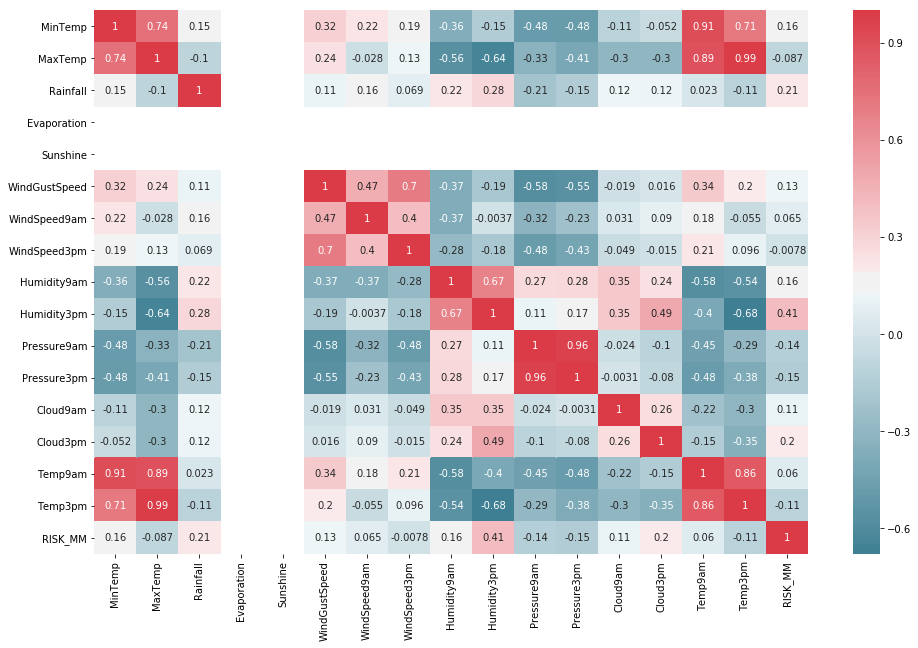

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from time import time
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
f, ax = plt.subplots(figsize=(16, 10))
corr = df.corr()
corr_mtx = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=False, ax=ax, annot = True)

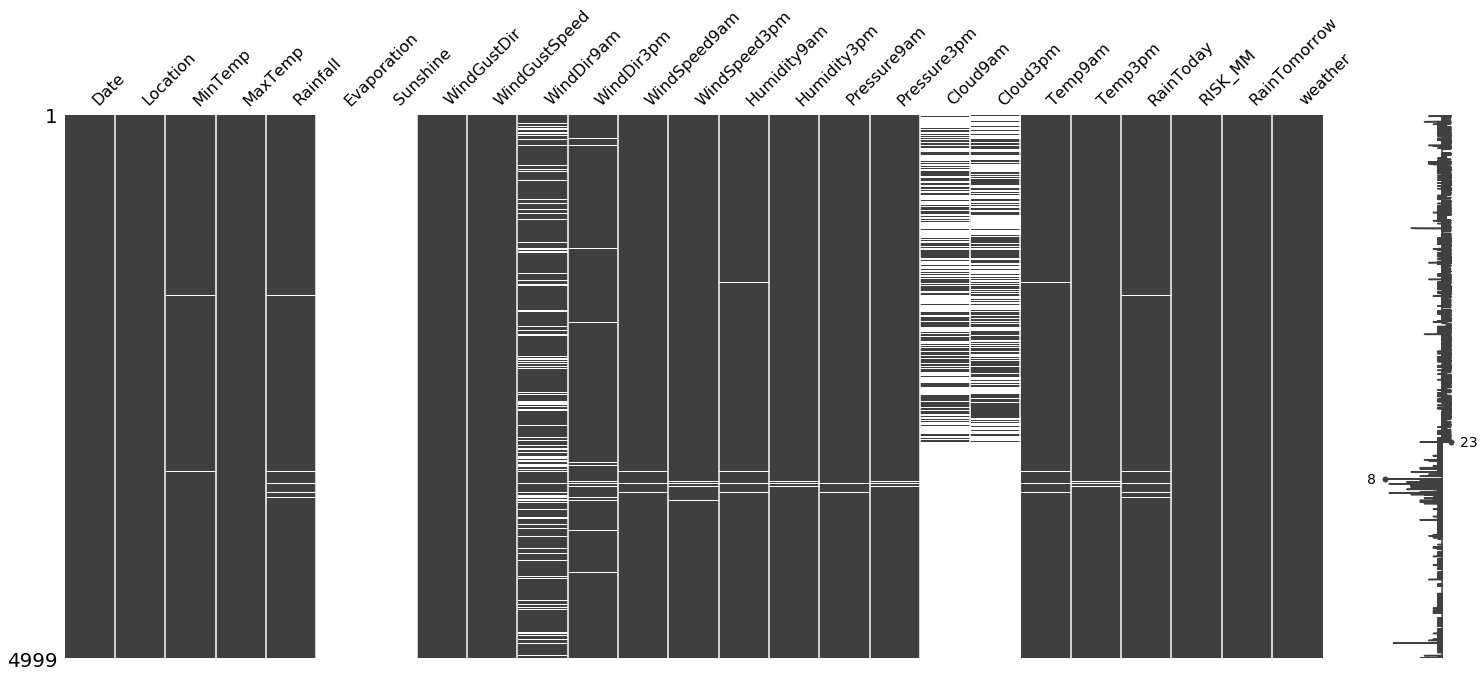

In [0]:
import missingno as msno
msno.matrix(df)

<Figure size 576x576 with 0 Axes>

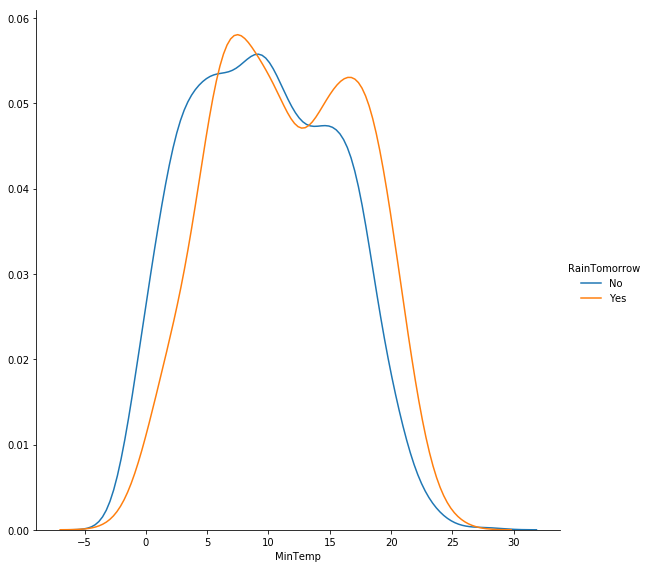

In [112]:
        plt.figure(figsize=(8,8))
        sns.FacetGrid(df2, hue="RainTomorrow", size=8).map(sns.kdeplot, "MinTemp").add_legend()
        plt.ioff() 
        plt.show()

<Figure size 576x576 with 0 Axes>

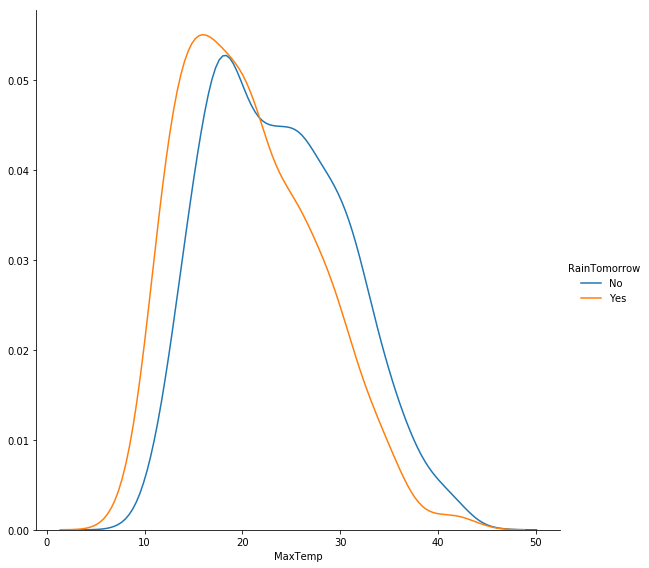

In [103]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df2, hue="RainTomorrow", size=8).map(sns.kdeplot, "MaxTemp").add_legend()
plt.ioff() 
plt.show()

<Figure size 576x576 with 0 Axes>

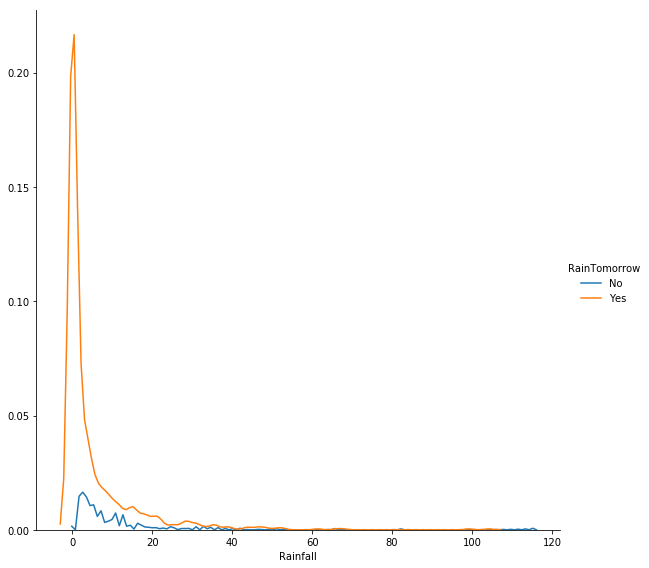

In [113]:
plt.figure(figsize=(8,8))
sns.FacetGrid(df2, hue="RainTomorrow", size=8).map(sns.kdeplot, "Rainfall").add_legend()
plt.ioff() 
plt.show()